In [2]:
import panel as pn
pn.extension('plotly')
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

In [27]:
import seaborn as sns

In [10]:
file_path_imdb_faces = Path("Data/movie_data_faces_cleaned.csv")
imdb_modified_data = pd.read_csv(file_path_imdb_faces, index_col = 'title_year')
imdb_modified_data.head()

,facenumber_in_poster,imdb_score,MOVIE,GENRE,MPAA RATING,DISTRIBUTOR,TOTAL FOR YEAR,TOTAL IN 2019 DOLLARS,TICKETS SOLD
title_year,,,,,,,,,
1995,4.0,5.4,Batman Forever,Drama,PG-13,Warner Bros.,184031112,387522978,42306002
1996,0.0,6.9,Independence Day,Adventure,PG-13,20th Century Fox,306169255,634504608,69269062
1997,2.0,7.3,Men in Black,Adventure,PG-13,Sony Pictures,250650052,500207943,54607854
1998,2.0,7.7,Titanic,Adventure,PG-13,Paramount Pictures,443319081,865842808,94524324
1999,4.0,6.5,Star Wars Ep. I: The Phantom Menace,Adventure,PG,20th Century Fox,430443350,776153749,84732942


In [11]:
file_path_imdb_faces = Path("Data/all_movies_faces_analysis.csv")
all_movies_faces = pd.read_csv(file_path_imdb_faces, index_col = 'title_year')
all_movies_faces.drop(columns = ['Unnamed: 0'],inplace = True)
all_movies_faces.head()

,facenumber_in_poster,movie_title,imdb_score,gross
title_year,,,,
2009.0,0.0,Avatar,7.9,760505847
2007.0,0.0,Pirates of the Caribbean: At World's End,7.1,309404152
2015.0,1.0,Spectre,6.8,200074175
2012.0,0.0,The Dark Knight Rises,8.5,448130642
2012.0,1.0,John Carter,6.6,73058679


Faces contain the amount of actors faces, doesn't count CGI characters, or characracters with a mask covering their face, like Batman. Shrek and Toy Story are outliers for this data. 

The Highest Grossers Tables lists the top grossing movie for each year based on the tickets sold for each movie during the course of that respective year and also its corresponding year 2019 valuation(adjusted for inflation), Only NOrth AMerica

In [22]:
top_gross_faces = imdb_modified_data.hvplot.bar(x = 'MOVIE', y = 'facenumber_in_poster', rot = 90, width = 700, height = 500)

In [21]:
tickets_sold = imdb_modified_data.hvplot.bar(x = 'MOVIE', y = ' TICKETS SOLD ', rot = 90, width = 700, height = 500)

In [24]:
pn.Row(tickets_sold, top_gross_faces)

Row
    [0] HoloViews(Bars)
    [1] HoloViews(Bars)

The Highest Grossers Tables lists the top grossing movie for each year based on the tickets sold for each movie during the course of that respective year and also its corresponding year 2019 valuation(adjusted for inflation), Only NOrth AMerica

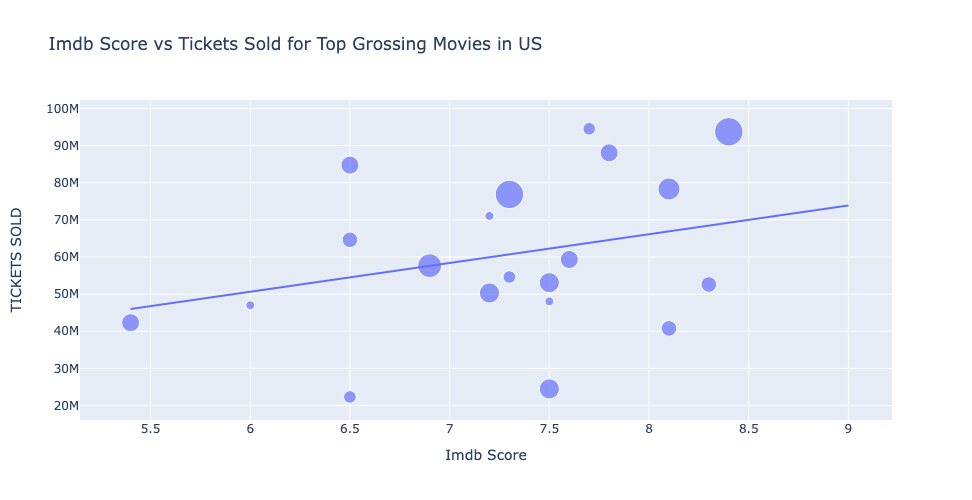

In [44]:
#shows relationship between tickets sold and imdb_score, with size of bubble indiates the amount of faces
fig = px.scatter(
  imdb_modified_data, x='imdb_score', y=' TICKETS SOLD ', size = 'facenumber_in_poster', trendline = 'ols',
    title = 'Imdb Score vs Tickets Sold for Top Grossing Movies in US', labels = { 'imdb_score':'Imdb Score'}, height = 500
)
fig
#other scatter plot visualizations using this data wasn't as good, so I'm sticking with only this plot.

In [26]:
#for the top grossing films per year
imdb_modified_data.corr()
#for the highest grossing films per year you can see there is a positive correlaion between every variable
#speifically, number of faces is most correlated with the total earning per year and the amount of tickets sold
#less so the imdb score

#additionally, it seems imdb_score has more to do with sucess than the number of faces on the poster.
#imdb_score is more correlated with tickets sold than faces are.
#my conclusion is, if there are more faces on the poster, and the imdb score is good then it results in more tickets sold. 

,facenumber_in_poster,imdb_score,TOTAL FOR YEAR,TOTAL IN 2019 DOLLARS,TICKETS SOLD
facenumber_in_poster,1.000000,0.169030,0.535908,0.245440,0.245440
imdb_score,0.169030,1.000000,0.484371,0.349586,0.349586
TOTAL FOR YEAR,0.535908,0.484371,1.000000,0.765273,0.765273
TOTAL IN 2019 DOLLARS,0.245440,0.349586,0.765273,1.000000,1.000000
TICKETS SOLD,0.245440,0.349586,0.765273,1.000000,1.000000


<AxesSubplot:>

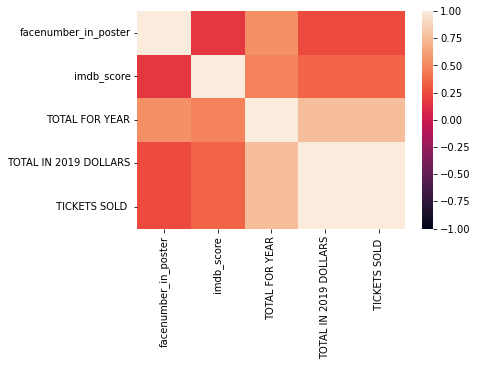

In [28]:
#correlations visualized 
sns.heatmap(imdb_modified_data.corr(), vmin = -1, vmax = 1)
#lighter means more correlated, focus on first 2 columns

In [25]:
all_movies_faces.corr() #for overall, all movies, multiple countries
#this shows actually that a slight negative correlation between number of faces on poster imdb score 
#I think this might have something to do with too many characters making a movie worse, but it means more money
#First thing that comes to mind is EPIC movie and those type of satire films with multiple faces on poster. 
#however number of faces tends to correlate with more gross
#additionally, similar to before imdb score has the most to do with gross. 
#This data set also contains ALL movies, where as before only considered the TOP movies.


,facenumber_in_poster,imdb_score,gross
facenumber_in_poster,1.000000,-0.072831,0.036341
imdb_score,-0.072831,1.000000,0.175512
gross,0.036341,0.175512,1.000000


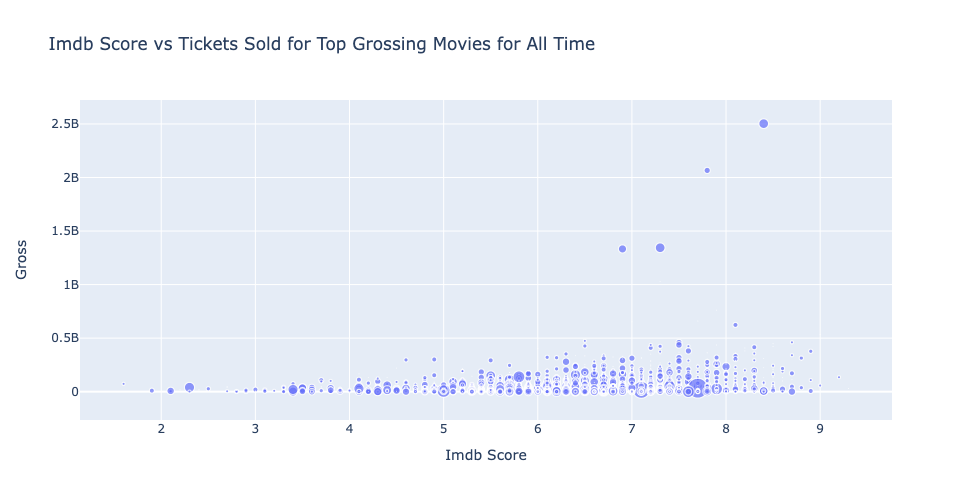

In [48]:
fig2 = px.scatter(
  all_movies_faces, x='imdb_score', y='gross', size = 'facenumber_in_poster', height = 500,
    title = 'Imdb Score vs Tickets Sold for Top Grossing Movies for All Time', labels = { 'imdb_score':'Imdb Score', 'gross': 'Gross'}
)
fig2